In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
mydata = pd.read_csv("최종별점전체3.csv",sep=",",encoding = "utf-8")
y=mydata['관객수범주'].values
x_data = mydata.drop('1주차누적관객수', axis=1)
x_data = x_data.drop('1주차최대스크린수', axis=1)
x_data = x_data.drop('관객수범주', axis=1)
x= x_data.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [36]:
# Model 4. SVM - standard scaling
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(X_train)
train_data_StandardScale = StandardScaler.transform(X_train)
StandardScaler.fit(X_test)
test_data_StandardScale = StandardScaler.transform(X_test)

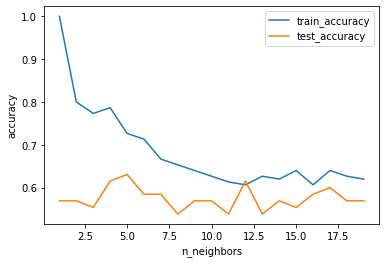

In [37]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_data_StandardScale, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(train_data_StandardScale, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(test_data_StandardScale, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [39]:
# Model 3. KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
gb_param_grid = {
    'n_neighbors' : [3],
}

cv=StratifiedKFold(n_splits=5, random_state=42)
gb_grid = GridSearchCV(model, param_grid = gb_param_grid,
                      n_jobs=-1,verbose=1,cv=cv)
gb_grid.fit(train_data_StandardScale,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\dltmd\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3]}, verbose=1)

In [40]:
from sklearn.metrics import classification_report
model = gb_grid.best_estimator_
pred = model.predict(test_data_StandardScale)
train_score = model.score(train_data_StandardScale, y_train)
test_score = model.score(test_data_StandardScale, y_test)

print("훈련 세트 정확도 : " +str(train_score))
print("테스트 세트 정확도 : " +str(test_score))
print("\n")

print(classification_report(y_test,pred,digits=4))

훈련 세트 정확도 : 0.7733333333333333
테스트 세트 정확도 : 0.5538461538461539


              precision    recall  f1-score   support

         범주1     0.6364    0.7000    0.6667        20
         범주2     0.5385    0.2593    0.3500        27
         범주3     0.5000    0.8333    0.6250        18

    accuracy                         0.5538        65
   macro avg     0.5583    0.5975    0.5472        65
weighted avg     0.5579    0.5538    0.5236        65

